In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random, datetime, os, shutil, math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.utils as image


In [ ]:
# WARNING: this code is used to import dataset from kaggle 
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#WARNING: this code is used while importing dataset from kaggle 
#changing the working directory
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
#WARNING: this code is used while importing dataset from kaggle 
#changing the working directory
!kaggle datasets download -d bhawks/pokemon-generation-one-22k

pokemon-generation-one-22k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#WARNING: this code is used while importing dataset from kaggle 
#unzipping the zip files and deleting the zip files
!unzip \*.zip 

In [ ]:
#creating test dataset from the train dataset
dir_path='/content/gdrive/MyDrive/Kaggle/PokemonData'
classes = os.listdir(dir_path)

In [ ]:
#for creating a train folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train")

0

In [ ]:
#moving all images from root folder to train folder
os.system("mv /content/gdrive/MyDrive/Kaggle/PokemonData/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/")

256

In [ ]:
# Creating the test folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test")


0

In [ ]:
#copying all train data to test folder, in order to get same folder structure
os.system("cp -r /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/")

0

In [ ]:
#deleting images from sub directories of test folder
os.system("find /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/ -name '*.*' -type f -delete")

0

In [ ]:
train_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train'
test_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test'

In [ ]:
# Copying 15 random images from train folders to test folders
def prep_test_data(pokemon, train_dir, test_dir):
  pop = os.listdir(train_dir+'/'+pokemon)
  test_data=random.sample(pop, 15)
  print(test_data)
  for f in test_data:
    shutil.copy(train_dir+'/'+pokemon+'/'+f, test_dir+'/'+pokemon+'/')

In [ ]:
#performing samething for each folder in train folder
for poke in os.listdir(train_dir):
  prep_test_data(poke, train_dir, test_dir)

In [ ]:
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 151
[(0, 'Abra'), (1, 'Aerodactyl'), (2, 'Alakazam'), (3, 'Arbok'), (4, 'Arcanine'), (5, 'Articuno'), (6, 'Beedrill'), (7, 'Bellsprout'), (8, 'Blastoise'), (9, 'Bulbasaur'), (10, 'Butterfree'), (11, 'Caterpie'), (12, 'Chansey'), (13, 'Charizard'), (14, 'Charmander'), (15, 'Charmeleon'), (16, 'Clefable'), (17, 'Clefairy'), (18, 'Cloyster'), (19, 'Cubone'), (20, 'Dewgong'), (21, 'Diglett'), (22, 'Ditto'), (23, 'Dodrio'), (24, 'Doduo'), (25, 'Dragonair'), (26, 'Dragonite'), (27, 'Dratini'), (28, 'Drowzee'), (29, 'Dugtrio'), (30, 'Eevee'), (31, 'Ekans'), (32, 'Electabuzz'), (33, 'Electrode'), (34, 'Exeggcute'), (35, 'Exeggutor'), (36, 'Farfetchd'), (37, 'Fearow'), (38, 'Flareon'), (39, 'Gastly'), (40, 'Gengar'), (41, 'Geodude'), (42, 'Gloom'), (43, 'Golbat'), (44, 'Goldeen'), (45, 'Golduck'), (46, 'Golem'), (47, 'Graveler'), (48, 'Grimer'), (49, 'Growlithe'), (50, 'Gyarados'), (51, 'Haunter'), (52, 'Hitmonchan'), (53, 'Hitmonlee'), (54, 'Horsea'), (55, 'Hypno'), (

In [ ]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]

In [ ]:
def show_pokemon(pokemon):
  num = len(pokemon)
  if num == 0:
    return None
  rows = int(math.sqrt(num))
  cols = (num+1)//rows
  f, axs = plt.subplots(rows, cols)
  fig = 0
  for b in pokemon:
    img = image.load_img(b)
    row = fig // cols
    col = fig % cols
    axs[row, col].imshow(img)
    fig += 1
  plt.show()

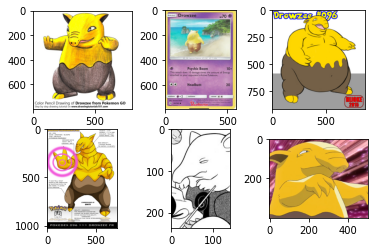

In [ ]:
dir_name = os.path.join(train_dir,"Drowzee")
all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
show_pokemon(all_images[0:6])

In [ ]:
image_size = (64, 64, 3)
datagen=ImageDataGenerator(rescale = 1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           )

In [ ]:
training_set=datagen.flow_from_directory(train_dir,
                                         target_size=image_size[:2],
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='rgb'
                                         )

Found 22621 images belonging to 151 classes.


In [ ]:
validation_set=datagen.flow_from_directory(test_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='rgb'
                                           )

Found 2262 images belonging to 151 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras import applications
from keras.utils import plot_model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 151)               4

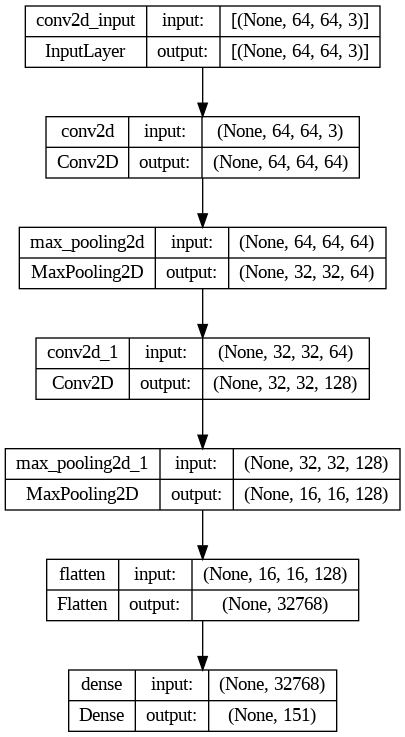

In [ ]:
#defining model
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()
plot_model(neuralnetwork_cnn, show_shapes=True) 

In [ ]:
history = neuralnetwork_cnn.fit(
    training_set, validation_data=validation_set,
    callbacks=[es, ckpt, rlp], epochs = 2, 
)

Epoch 1/2
164/707 [=====>........................] - ETA: 8:31 - loss: 4.6024 - acc: 0.0648

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


707/707 [==============================] - ETA: 0s - loss: 3.8068 - acc: 0.1868
Epoch 1: loss improved from inf to 3.80684, saving model to model.h5
707/707 [==============================] - 713s 1s/step - loss: 3.8068 - acc: 0.1868 - val_loss: 2.9879 - val_acc: 0.3342 - lr: 0.0010
Epoch 2/2
707/707 [==============================] - ETA: 0s - loss: 2.6886 - acc: 0.3942
Epoch 2: loss improved from 3.80684 to 2.68858, saving model to model.h5
707/707 [==============================] - 701s 991ms/step - loss: 2.6886 - acc: 0.3942 - val_loss: 2.3392 - val_acc: 0.4637 - lr: 0.0010


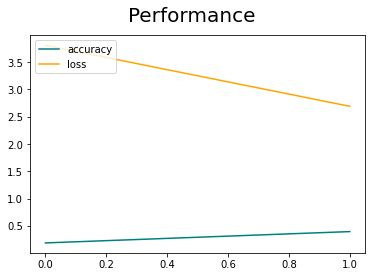

In [ ]:
fig = plt.figure()
plt.plot(history.history['acc'], color='teal', label='accuracy')
plt.plot(history.history['loss'], color='orange', label='loss')
fig.suptitle('Performance', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Test

In [ ]:
import cv2
import tensorflow as tf

In [ ]:
def show_image(image):
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img


In [ ]:
def cnn_predict(pokemon):
  img = show_image(pokemon)
  resize = tf.image.resize(img, (64,64))
  yhat = neuralnetwork_cnn.predict(np.expand_dims(resize/255, 0))
  predicted_pokemon = target_classes[yhat.argmax()]
  print(predicted_pokemon)
  dir_name = os.path.join(train_dir,predicted_pokemon)
  all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
  for image in all_images:
    if image.split('.')[1] in ['jpg','png','jpeg'] :
      show_image(image)
      return



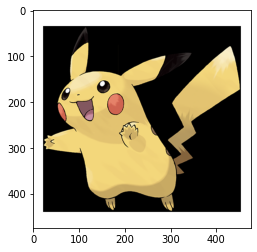

1/1 [==============================] - 0s 32ms/step
Pikachu


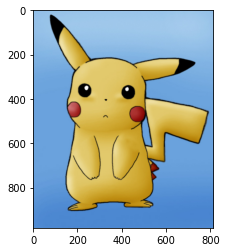

In [ ]:
cnn_predict('pickachu.png')

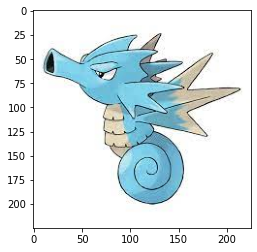

1/1 [==============================] - 0s 28ms/step
Seadra


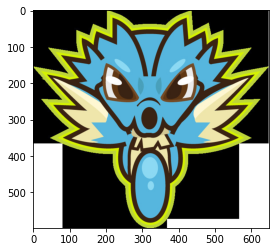

In [ ]:
cnn_predict('seadra.jpeg')

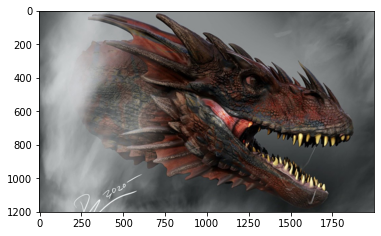

1/1 [==============================] - 0s 44ms/step
Kabutops


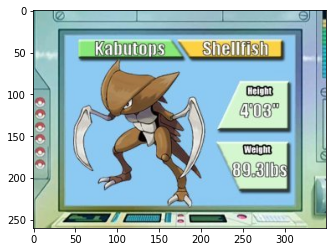

In [ ]:
cnn_predict('dragon.jpeg')

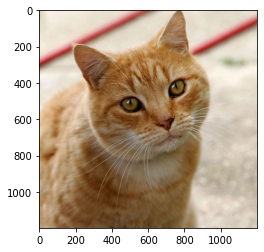

1/1 [==============================] - 0s 48ms/step
Eevee


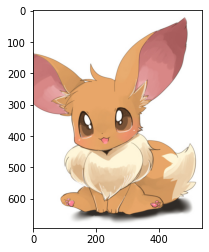

In [ ]:
cnn_predict('cat.jpg')